In [29]:
import ee
import geemap
import requests
from PIL import Image as PILImage
from IPython.display import Image as IPImage
from io import BytesIO

#PART A : HSV Transformation

In [28]:
ee.Authenticate()
ee.Initialize(project='ee-nandiinii')

In [22]:
# Load Landsat 8 image
image = ee.Image('LANDSAT/LC08/C02/T1_TOA/LC08_044034_20140318')

In [23]:
# Convert RGB to HSV
hsv = image.select(['B4', 'B3', 'B2']).rgbToHsv()

In [24]:
# Swap in the panchromatic band and convert back to RGB
sharpened = ee.Image.cat(
    [hsv.select('hue'), hsv.select('saturation'), image.select('B8')]
).hsvToRgb()

In [30]:
# Visualize and save as image
vis_params = {
    'bands': ['B4', 'B3', 'B2'],
    'min': 0,
    'max': 0.25,
    'gamma': [1.1, 1.1, 1],
}
region = image.geometry()

# Generate thumbnails
rgb_thumb_url = image.visualize(**vis_params).getThumbURL({
    'region': region,
    'dimensions': 512,
    'format': 'png'
})
sharpened_thumb_url = sharpened.visualize(min=0, max=0.25, gamma=[1.3,1.3,1.3]).getThumbURL({
    'region': region,
    'dimensions': 512,
    'format': 'png'
})

In [31]:
# Download and save
rgb_response = requests.get(rgb_thumb_url)
rgb_img = PILImage.open(BytesIO(rgb_response.content))
rgb_img.save('original_rgb.png')

sharpened_response = requests.get(sharpened_thumb_url)
sharpened_img = PILImage.open(BytesIO(sharpened_response.content))
sharpened_img.save('hsv_pan_sharpened.png')

Original RGB Image:


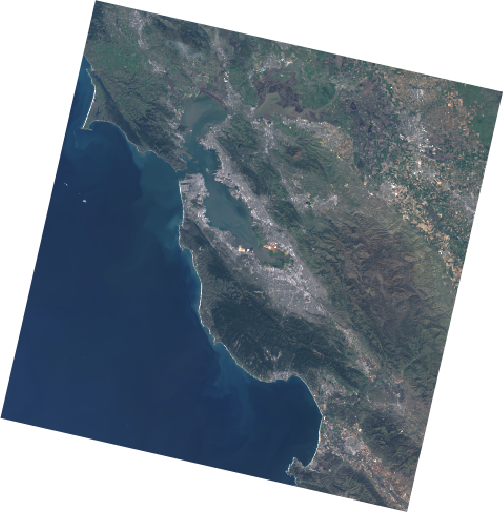

HSV Pan-Sharpened Image:


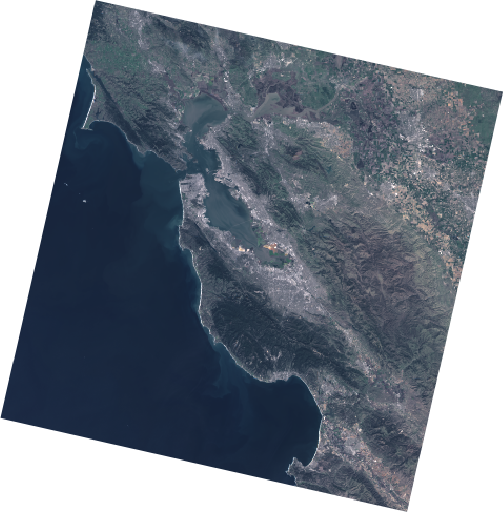

In [32]:

# Display
print("Original RGB Image:")
display(IPImage('original_rgb.png'))

print("HSV Pan-Sharpened Image:")
display(IPImage('hsv_pan_sharpened.png'))

#Part B: Brovey Transform

In [9]:
# Load Landsat 8 image
image = ee.Image('LANDSAT/LC08/C02/T1_TOA/LC08_044034_20140318')

# Select RGB bands
rgb = image.select(['B4', 'B3', 'B2'])
# Select Panchromatic band
pan = image.select('B8')

In [10]:
# Brovey transform
sum_rgb = rgb.reduce(ee.Reducer.sum())
brovey = rgb.divide(sum_rgb).multiply(pan)

In [11]:
# Visualize and save as image
brovey_thumb_url = brovey.visualize(min=0, max=0.3, gamma=[1.3,1.3,1.3]).getThumbURL({
    'region': region,
    'dimensions': 512,
    'format': 'png'
})

Brovey Pan-Sharpened Image:


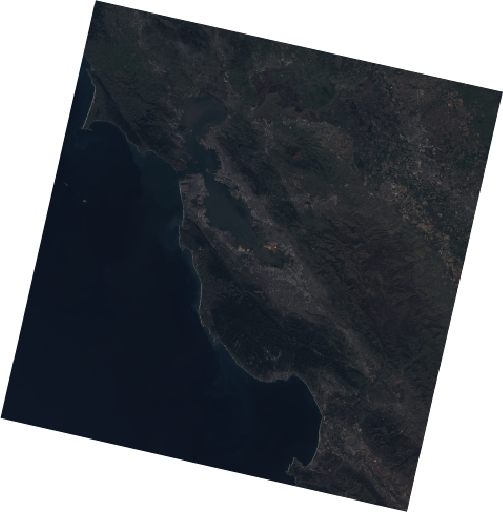

In [12]:
brovey_response = requests.get(brovey_thumb_url)
brovey_img = PILImage.open(BytesIO(brovey_response.content))
brovey_img.save('brovey_pan_sharpened.png')

# Display
print("Brovey Pan-Sharpened Image:")
display(IPImage('brovey_pan_sharpened.png'))